In [1]:
#importing libraries

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

import nltk

In [3]:
%%time
df=pd.read_csv('wiki_movie_plots_deduped_cleaned_genre.csv')

Wall time: 766 ms


In [4]:
df['Plot']

0        A bartender is working at a saloon, serving dr...
1        The moon, painted with a smiling face hangs ov...
2        The film, just over a minute long, is composed...
3        Lasting just 61 seconds and consisting of two ...
4        The earliest known adaptation of the classic f...
                               ...                        
42530    The film begins in 1919, just after World War ...
42531    Two musicians, Salih and Gürkan, described the...
42532    Zafer, a sailor living with his mother Döndü i...
42533    The film centres around a young woman named Am...
42534    The writer Orhan Şahin returns to İstanbul aft...
Name: Plot, Length: 42535, dtype: object

In [5]:
df['Plot'][3233]

"Cliff Taylor (George Raft) is an ex-con who wants to go straight, but since being released from prison on parole, he finds it hard to find and hold a job due to his criminal past. Cliff's younger brother Tim (William Holden) is worried because he cannot afford to marry his girlfriend Peggy (Jane Bryan) and increasingly disillusioned about being able to make a position for himself in the world honestly. Afraid that Tim might end up leading a life of crime like himself, Cliff decides to help him find the money to settle down. He tells his family he has found a job as a salesman, but in reality he gets back to ex fellow convict Charles Martin (Humphrey Bogart) and they organize a number of robberies. With the money he gets from his criminal activities, Cliff is able to buy a garage for his brother, who is now able to get married. Cliff, in the meantime, decides to quit the gang. However, after a failed robbery, Martin and his pals hide in Tim's garage. The police find out, and Tim is tak

### List of punctuations

In [6]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

### Functions for cleaning the data

In [7]:
def remove_punctuation(text):
    return ''.join([words.lower() for words in text if words not in string.punctuation])


def tokenization(text):
    return nltk.tokenize.word_tokenize(text)


stopwords = nltk.corpus.stopwords.words('english')
def stopwards(words):
    return [i for i in words if i not in stopwords]

lemma= nltk.WordNetLemmatizer()

def lemmatization(words):
    return ' '.join([lemma.lemmatize(word) for word in words])


def replace_year(x):
    l=re.findall("\d{4}", x)
    for i in l:
        x=x.replace(i, 'wxyz')
    return x

### Cleaning the PLOT's

In [8]:
replace_dict={
    "\r": " ",
    "\n":" ",
}

for key,items in replace_dict.items():
    df['Plot']= df['Plot'].str.replace(key,items)
    
    
df['Plot_1'] = df['Plot'].apply(lambda x: replace_year(x))

In [9]:
#%%time
#df['Plot_1']=df['Plot_1'].apply(lambda x: re.sub(r'[0-9]', ' ',x))

### Removing the Punctations and Numbers

In [10]:
%%time
df['plot_without_punct']=df['Plot_1'].apply(lambda x: re.sub(r'[0-9]', '',x)).apply(lambda x: remove_punctuation(x))

Wall time: 15.5 s


### Tokenizing the words

In [11]:
%%time
df['plot_tokenized']=df['plot_without_punct'].apply(lambda x: tokenization(x))

Wall time: 47.2 s


### Removing the Stopwords

In [12]:
%%time 
df['plot_tokenized_removed_sw']=df['plot_tokenized'].apply(lambda x: stopwards(x))

Wall time: 24.5 s


### Lemmatization

In [13]:
%%time 
df['plot_lemma']=df['plot_tokenized_removed_sw'].apply(lambda x: lemmatization(x))

Wall time: 34.9 s


In [14]:
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Genre_updated,Plot_1,plot_without_punct,plot_tokenized,plot_tokenized_removed_sw,plot_lemma
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",NaN,"A bartender is working at a saloon, serving dr...",a bartender is working at a saloon serving dri...,"[a, bartender, is, working, at, a, saloon, ser...","[bartender, working, saloon, serving, drinks, ...",bartender working saloon serving drink custome...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",NaN,"The moon, painted with a smiling face hangs ov...",the moon painted with a smiling face hangs ove...,"[the, moon, painted, with, a, smiling, face, h...","[moon, painted, smiling, face, hangs, park, ni...",moon painted smiling face hang park night youn...
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",NaN,"The film, just over a minute long, is composed...",the film just over a minute long is composed o...,"[the, film, just, over, a, minute, long, is, c...","[film, minute, long, composed, two, shots, fir...",film minute long composed two shot first girl ...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,NaN,Lasting just 61 seconds and consisting of two ...,lasting just seconds and consisting of two sh...,"[lasting, just, seconds, and, consisting, of, ...","[lasting, seconds, consisting, two, shots, fir...",lasting second consisting two shot first shot ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,NaN,The earliest known adaptation of the classic f...,the earliest known adaptation of the classic f...,"[the, earliest, known, adaptation, of, the, cl...","[earliest, known, adaptation, classic, fairyta...",earliest known adaptation classic fairytale fi...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ...",NaN,"The film begins in wxyz, just after World War ...",the film begins in wxyz just after world war i...,"[the, film, begins, in, wxyz, just, after, wor...","[film, begins, wxyz, world, war, ended, centre...",film begin wxyz world war ended centre around ...
42531,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the...",comedy,"Two musicians, Salih and Gürkan, described the...",two musicians salih and gürkan described the a...,"[two, musicians, salih, and, gürkan, described...","[two, musicians, salih, gürkan, described, adv...",two musician salih gürkan described adventure ...
42532,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i...",comedy,"Zafer, a sailor living with his mother Döndü i...",zafer a sailor living with his mother döndü in...,"[zafer, a, sailor, living, with, his, mother, ...","[zafer, sailor, living, mother, döndü, coastal...",zafer sailor living mother döndü coastal villa...
42533,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,comedy,The film centres arou

### Selecting the dersired columns

In [15]:
df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot', 'Genre_updated', 'Plot_1',
       'plot_without_punct', 'plot_tokenized', 'plot_tokenized_removed_sw',
       'plot_lemma'],
      dtype='object')

In [16]:
df=df[['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre','Genre_updated', 'Wiki Page', 'Plot', 'plot_lemma']]

In [17]:
df.rename(columns={'plot_lemma': 'Plot_cleanned'},inplace=True)

In [18]:
df

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Genre_updated,Wiki Page,Plot,Plot_cleanned
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr...",bartender working saloon serving drink custome...
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov...",moon painted smiling face hang park night youn...
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,NaN,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed...",film minute long composed two shot first girl ...
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,NaN,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...,lasting second consisting two shot first shot ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,NaN,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...,earliest known adaptation classic fairytale fi...
...,...,...,...,...,...,...,...,...,...,...
42530,2014,The Water Diviner,Turkish,Director: Russell Crowe,Director: Russell Crowe\r\nCast: Russell Crowe...,unknown,NaN,https://en.wikipedia.org/wiki/The_Water_Diviner,"The film begins in 1919, just after World War ...",film begin wxyz world war ended centre around ...
42531,2017,Çalgı Çengi İkimiz,Turkish,Selçuk Aydemir,"Ahmet Kural, Murat Cemcir",comedy,comedy,https://en.wikipedia.org/wiki/%C3%87alg%C4%B1_...,"Two musicians, Salih and Gürkan, described the...",two musician salih gürkan described adventure ...
42532,2017,Olanlar Oldu,Turkish,Hakan Algül,"Ata Demirer, Tuvana Türkay, Ülkü Duru",comedy,comedy,https://en.wikipedia.org/wiki/Olanlar_Oldu,"Zafer, a sailor living with his mother Döndü i...",zafer sailor living mother döndü coastal villa...
42533,2017,Non-Transferable,Turkish,Brendan Bradley,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...",romantic comedy,comedy,https://en.wikipedia.org/wiki/Non-Transferable...,The film centres around a young woman named Am...,film centre around young woman named amy tyler...


In [19]:
df.to_csv('wiki_movie_plots_deduped_cleaned_genre_and_plot.csv',index=False)

In [20]:
data=df[['Plot','Plot_cleanned','Genre_updated']]

In [21]:
data['Len_of_Plot']=data['Plot_cleanned'].apply(lambda x: len(x))

In [22]:
max(data['Len_of_Plot'])

23062

In [23]:
import matplotlib.pyplot as plt

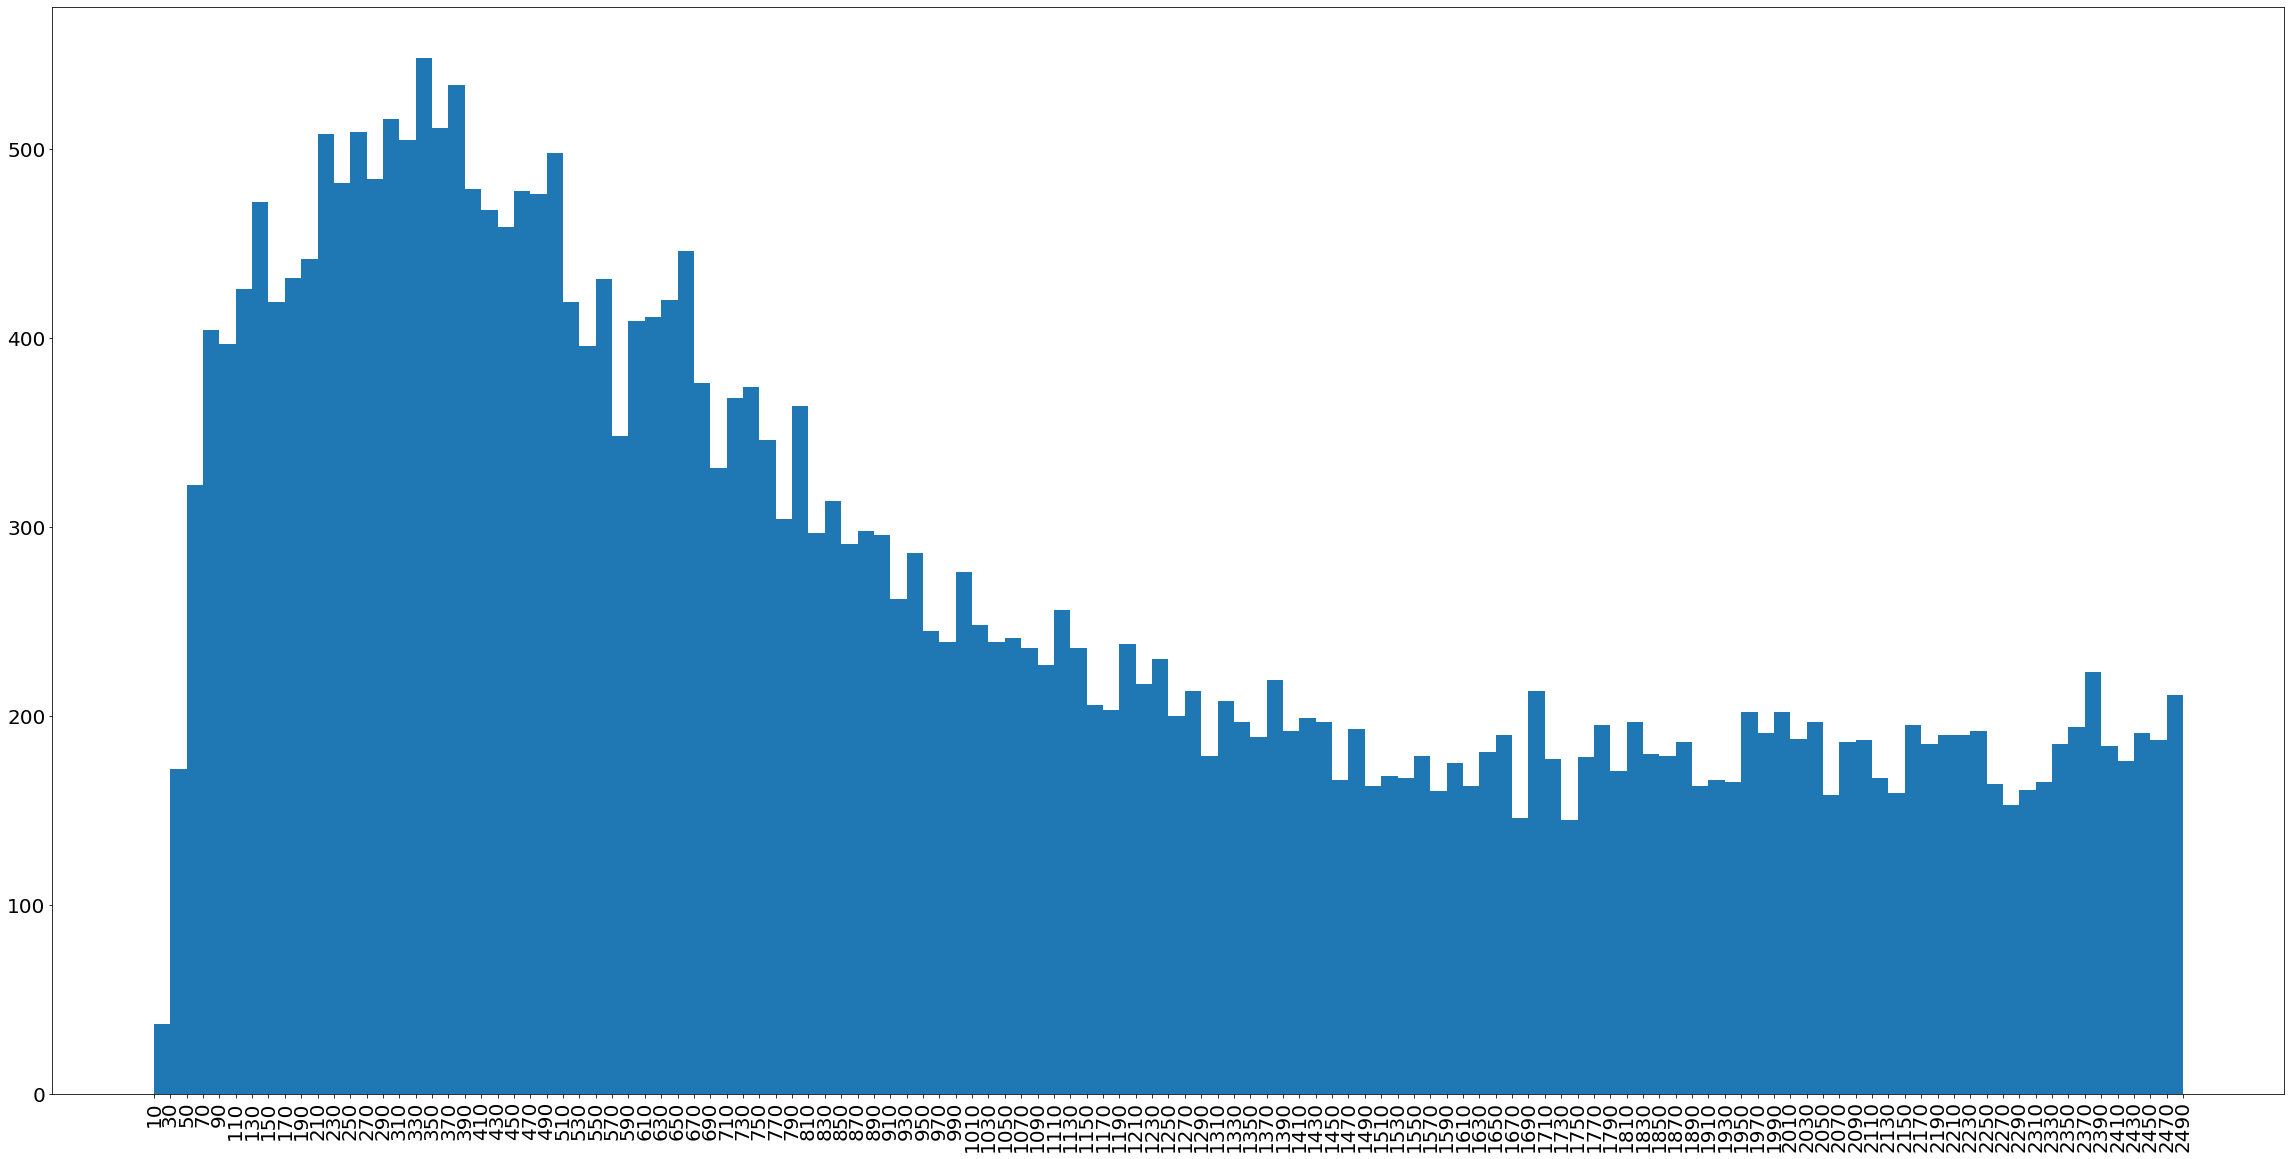

In [24]:
bins= [i for i in range(10,2500,20)]
plt.rcParams["figure.figsize"] = (40,20)
plt.hist(data['Len_of_Plot'], bins=bins)
plt.xticks(bins,size=20,rotation=90)
plt.yticks(size=20)
plt.show() 
